In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weatheraus/weatherAUS.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix, classification_report

plt.rcParams['figure.figsize']=[12,10]

In [3]:
df=pd.read_csv('/kaggle/input/weatheraus/weatherAUS.csv')

In [4]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
categorical_features=[]

for i in df.columns:
    if df[i].dtype=='O':
        categorical_features.append(i)
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [8]:
df[categorical_features].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [9]:
#missing values in categorical featrures
df[categorical_features].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [10]:
df[categorical_features].describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2013-12-01,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


In [11]:
df['WindGustDir']=df['WindGustDir'].fillna('W')

In [12]:
df['WindDir9am']=df['WindDir9am'].fillna('N')

In [13]:
df['WindDir3pm']=df['WindDir3pm'].fillna('SE')

In [14]:
df['RainToday']=df['RainToday'].fillna('No')

In [15]:
df[categorical_features].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [16]:
for cat in categorical_features:
    print(f'Columns Name: {cat}')
    print(df[cat].value_counts())
    print('================================')

Columns Name: Date
Date
2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Columns Name: Location
Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast        

In [17]:
for cat in categorical_features:
    print(cat)
    print(df[cat].nunique())
    print('================================')

Date
3436
Location
49
WindGustDir
16
WindDir9am
16
WindDir3pm
16
RainToday
2
RainTomorrow
2


In [18]:
#date is categorical 
#date- 2018-05-01  --  Year,Month,Date
# here we cannot use data- time i.e 0 to 50 bcz we cannot know about the seasons or the year

df['Date']=pd.to_datetime(df['Date'])   #converts date column into standard datatime format
df['Year']=df['Date'].dt.year           #dt.year - extracts year number in datatime column
df['Month']=df['Date'].dt.month         #dt.month - extracts month number
df['Day']=df['Date'].dt.day             #dt.date - day info
df.drop('Date',axis=1,inplace=True)

In [19]:
'''
Date         | Day | Month | Year
2018-01-01   |  1  |   1   | 2018  
2018-01-02   |  2  |   1   | 2018
2018-01-03   |  3  |   1   | 2018
2018-01-04   |  4  |   1   | 2018
2018-02-01   |  1  |   2   | 2018

'''

'''
2018-01-01
2019-01-01
2020-01-01
2021-01-01
2022-01-01
If they as day as 1 and month as 1 then this will be the data
'''

'\n2018-01-01\n2019-01-01\n2020-01-01\n2021-01-01\n2022-01-01\nIf they as day as 1 and month as 1 then this will be the data\n'

In [20]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [21]:
Numerical_features=[]

for i in df.columns:
    if df[i].dtype!='O':
        Numerical_features.append(i)
Numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM',
 'Year',
 'Month',
 'Day']

In [22]:
df[Numerical_features].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
Year                 0
Month                0
Day                  0
dtype: int64

In [23]:
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','RISK_MM'],axis=1,inplace=True)

In [24]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day
count,141556.000000,141871.000000,140787.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,2017.000000,12.000000,31.000000


In [25]:
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

Location

In [26]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [27]:
df['Location'].nunique()

49

In [28]:
'''
Objective Encoding : Converts cat_features to numericals
Encoding Techniques:

1. One hot encoding : First will be 1 and rest will be 0
    Prblm: Creates lots of columns for categories are higher
2. Label Encoding:  
    Converts every single value to one single number
    Eg: A,B,C,D,E.... - 0,1,2,3,4....
3. Mean Encoding or Target Encoding :
    Cat_col  |  Heights(Target)
    --------------------------
      A      |  150
      B      |  125
      A      |  130
      C      |  109
      B      |  170
      A      |  160
    If asked for value of A then it gives the mean avg value of A
    i.e, A = (150+130+160)/3=146.7
    now A will be replaced with 146.7
    
If target column is categorical then it is btr to use Label Encoding

'''

'\nObjective Encoding : Converts cat_features to numericals\nEncoding Techniques:\n\n1. One hot encoding : First will be 1 and rest will be 0\n    Prblm: Creates lots of columns for categories are higher\n2. Label Encoding:  \n    Converts every single value to one single number\n    Eg: A,B,C,D,E.... - 0,1,2,3,4....\n3. Mean Encoding or Target Encoding :\n    Cat_col  |  Heights(Target)\n    --------------------------\n      A      |  150\n      B      |  125\n      A      |  130\n      C      |  109\n      B      |  170\n      A      |  160\n    If asked for value of A then it gives the mean avg value of A\n    i.e, A = (150+130+160)/3=146.7\n    now A will be replaced with 146.7\n    \nIf target column is categorical then it is btr to use Label Encoding\n\n'

In [29]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [30]:
le=LabelEncoder()
df['Location']=le.fit_transform(df['Location'])
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])
df['RainToday']=le.fit_transform(df['RainToday'])
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])

In [31]:
df['Location']

0          2
1          2
2          2
3          2
4          2
          ..
142188    41
142189    41
142190    41
142191    41
142192    41
Name: Location, Length: 142193, dtype: int64

In [32]:
df['Location'].unique()    # numbering is given as per alphabetical order

array([ 2,  4, 10, 11, 21, 24, 26, 27, 30, 34, 37, 38, 42, 45, 47,  9, 40,
       23,  5,  6, 35, 19, 18, 20, 25, 33, 44, 12,  7,  8, 14, 39,  0, 22,
       28, 48,  1, 46, 29, 32, 31, 36, 43, 15, 17,  3, 13, 16, 41])

In [33]:
df=df.fillna(0)

In [34]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [35]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5


In [36]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [37]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'Day'],
      dtype='object')

In [38]:
df_train=df.iloc[:99536]
df_test=df.iloc[99536:]

In [39]:
df_train = df_train.reset_index()
x_train = df_train.loc[:,['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'Day']]
y_train = df_train.loc[:,['RainTomorrow']]

x_test = df_test.loc[:,['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Year', 'Month',
       'Day']]
y_test = df_test.loc[:,['RainTomorrow']]

In [55]:
log_reg=LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0, solver='liblinear')

In [56]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
log_reg.coef_

array([[-6.21078859e-03,  7.86364174e-02,  9.32472710e-02,
         1.65932538e-02,  3.78440909e-02,  3.75788839e-02,
        -4.69744628e-02, -1.68758489e-02, -5.58138647e-03,
        -2.08187651e-02,  1.91840769e-03,  4.70956985e-02,
         3.69315158e-04, -5.41187544e-04, -2.76771935e-02,
        -1.23737768e-01,  4.73150179e-01, -2.43294023e-03,
         1.01164414e-02, -1.12370289e-03]])

In [58]:
log_reg.intercept_

array([0.000548])

In [59]:
#predict_proba method gives the probabilities for the target variable(0 and 1)
log_reg.predict_proba(x_test)[:,0]  #probability of getting 0

array([0.94583894, 0.95226412, 0.96891662, ..., 0.98977844, 0.98374446,
       0.98060263])

In [60]:
log_reg.predict_proba(x_test)[:,1]

array([0.05416106, 0.04773588, 0.03108338, ..., 0.01022156, 0.01625554,
       0.01939737])

In [61]:
#accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8418


In [62]:
y_pred_train = log_reg.predict(x_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8293


In [64]:
print('Training set score: {:.4f}'.format(log_reg.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg.score(x_test, y_test)))

Training set score: 0.8293
Test set score: 0.8418


In [66]:
# no over or underfitting
log_reg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
log_reg100.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, random_state=0, solver='liblinear')

In [67]:
print('Training set score: {:.4f}'.format(log_reg100.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg100.score(x_test, y_test)))

Training set score: 0.8291
Test set score: 0.8407


In [68]:
log_reg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)
log_reg001.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [69]:
print('Training set score: {:.4f}'.format(log_reg001.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg001.score(x_test, y_test)))

Training set score: 0.8289
Test set score: 0.8411


In [70]:
y_test.value_counts()

RainTomorrow
0               33852
1                8805
Name: count, dtype: int64

In [72]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[32718  1134]
 [ 5613  3192]]

True Positives(TP) =  32718

True Negatives(TN) =  3192

False Positives(FP) =  1134

False Negatives(FN) =  5613


<Axes: >

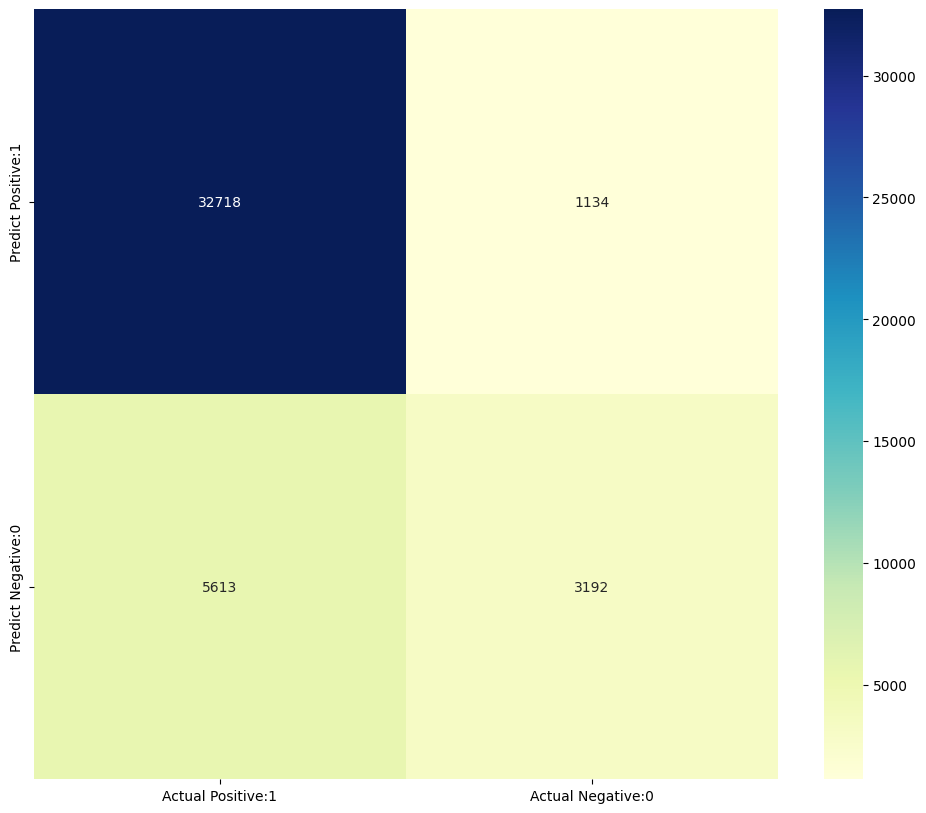

In [73]:
# converting to dataframe
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                  index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [74]:
#Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     33852
           1       0.74      0.36      0.49      8805

    accuracy                           0.84     42657
   macro avg       0.80      0.66      0.70     42657
weighted avg       0.83      0.84      0.82     42657



In [75]:
# or
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [79]:
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Confusion matrix:\n",conf_matrix)
print("Report:",classification_report_str)

Accuracy: 0.8418313524157817
Precision: 0.7378640776699029
Recall: 0.3625212947189097
Confusion matrix:
 [[32718  1134]
 [ 5613  3192]]
Report:               precision    recall  f1-score   support

           0       0.85      0.97      0.91     33852
           1       0.74      0.36      0.49      8805

    accuracy                           0.84     42657
   macro avg       0.80      0.66      0.70     42657
weighted avg       0.83      0.84      0.82     42657



In [81]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [82]:
#classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8418


In [83]:
# classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1582


In [84]:
# precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9665


In [85]:
# recall score
recall = TP / float(TP + FN)
print('Recall : {0:0.4f}'.format(recall))

Recall : 0.8536


In [86]:
# True_positive_rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8536


In [87]:
# False_positive_rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2621


In [88]:
#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7379
